In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

1.**transforming data csv to pandas dataframe** 

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/simplilearn/python with data science /project3/Comcast_telecom_complaints_data.csv")

In [ ]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
data.shape

(2224, 11)

In [ ]:
data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [ ]:
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%y')

In [ ]:
data['day']=data['Date'].dt.day
data['month']=data.Date.dt.month
data['year']=data.Date.dt.year

In [ ]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month,year
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015


In [ ]:
data.year.nunique()

1

In [ ]:
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
data['Customer_Complaint']=data['Customer Complaint']

In [ ]:
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month,year,Customer_Complaint
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,Comcast Cable Internet Speeds
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,Payment disappear - service got disconnected
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,Speed and Service
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,Comcast Imposed a New Usage Cap of 300GB that ...
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,Comcast not working and no service to boot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,4,2,2015,Service Availability
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,2,2015,Comcast Monthly Billing for Returned Modem
2221,331188,complaint about comcast,2015-09-06,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,6,9,2015,complaint about comcast
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,23,6,2015,Extremely unsatisfied Comcast customer


2.**Provide the trend chart for the number of complaints at monthly and daily granularity levels.**

In [ ]:
data.drop(columns='Customer Complaint',axis=1,inplace=True)

In [ ]:
A=data.Customer_Complaint.groupby(data['month']).count()

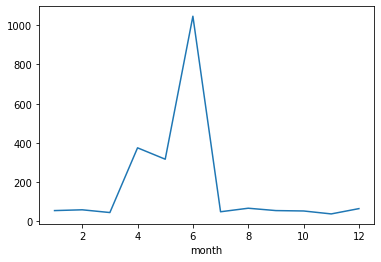

In [ ]:
A.plot(x="month", y="Customer_Complaint", kind="line")

month wise complaint

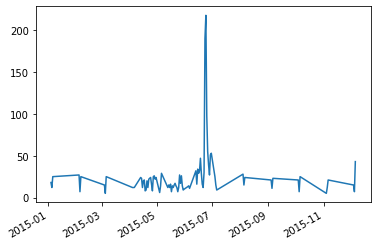

In [ ]:

data["Date"].value_counts().plot();

 3.**Provide a table with the frequency of complaint types.**

In [ ]:
table=data.Customer_Complaint.groupby(data['Ticket #']).sum()

In [ ]:
table=pd.DataFrame(table.value_counts() )

In [ ]:
table.shape

(1841, 1)

In [ ]:
table.head(10)

,Customer_Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Data Caps,11
Comcast Billing,11
Data Caps,11
Unfair Billing Practices,9
Comcast data cap,8
Comcast data caps,8


4. **max complaints for**

In [ ]:
table.idxmax()

Customer_Complaint    Comcast
dtype: object

In [ ]:
A=data.Status.groupby(data['Ticket #'])

In [ ]:
new_status=[]
for i in data['Status']:
  if i=='Open' or i=='Pending':
    new_status.append('Open')
  else :
    new_status.append('closed')



In [ ]:
data['new_status']=new_status

In [ ]:
data.head(3)

,Ticket #,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month,year,Customer_Complaint,new_status
0,250635,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,Comcast Cable Internet Speeds,closed
1,223441,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,Payment disappear - service got disconnected,closed
2,242732,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,Speed and Service,closed


In [ ]:
data.new_status.unique()

array(['closed', 'Open'], dtype=object)

In [ ]:
status_complaints=data.groupby(['State','new_status']).size().unstack().fillna(0)
status_complaints

new_status,Open,closed
State,,
Alabama,9.0,17.0
Arizona,6.0,14.0
Arkansas,0.0,6.0
California,61.0,159.0
Colorado,22.0,58.0
Connecticut,3.0,9.0
Delaware,4.0,8.0
District Of Columbia,2.0,14.0
District of Columbia,0.0,1.0


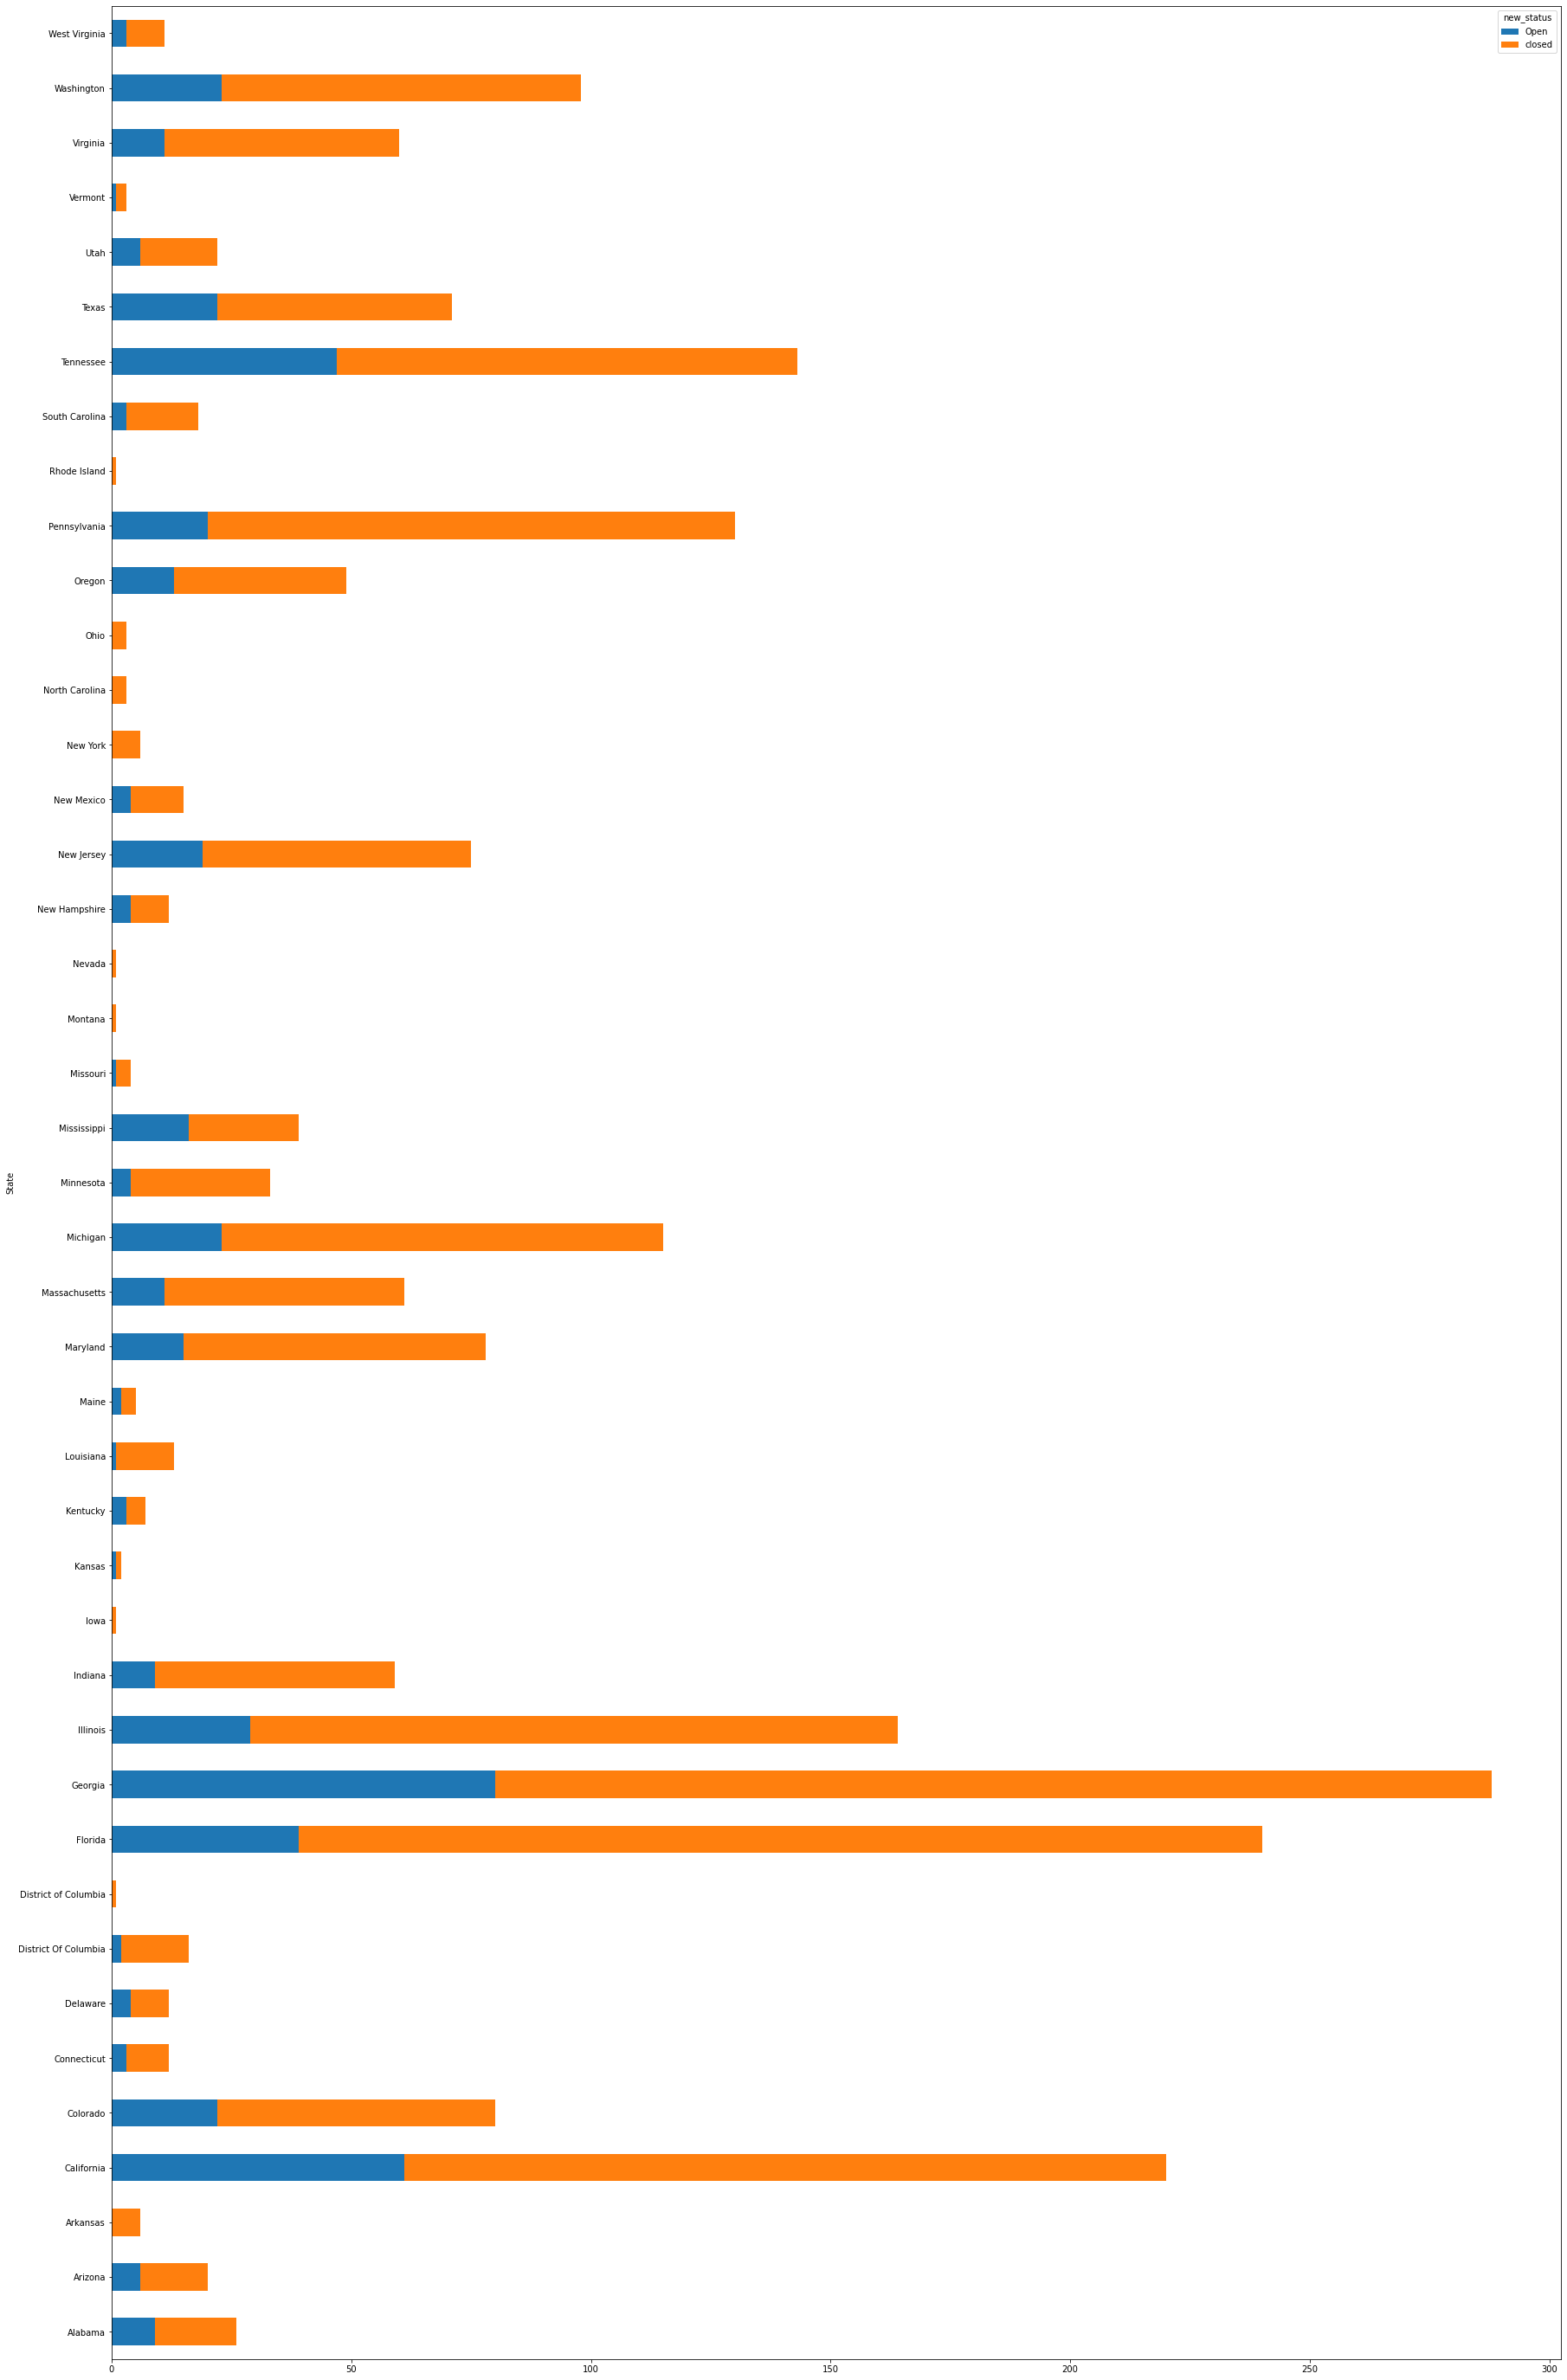

In [ ]:

status_complaints.plot(kind="barh" , figsize=(30,50), stacked=True)

**which state has maximum complaint**

In [ ]:
data.groupby("State").size().sort_values(ascending=False)[:1]

State
Georgia    288
dtype: int64

**resolved complaint via internet and customercare**

In [ ]:
A=data.new_status.value_counts()

In [ ]:
A=data.new_status.groupby(data['Received Via']==('internet' or 'Customer Care Calls' ))

In [ ]:
data.columns

Index(['Ticket #', 'Date', 'Date_month_year', 'Time', 'Received Via', 'City',
       'State', 'Zip code', 'Status', 'Filing on Behalf of Someone', 'day',
       'month', 'year', 'Customer_Complaint', 'new_status'],
      dtype='object')

In [ ]:
df_received = data[data['Received Via'].isin(['Internet','Customer Care Call'])]

In [ ]:
df_received.head()

,Ticket #,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month,year,Customer_Complaint,new_status
0,250635,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,Comcast Cable Internet Speeds,closed
1,223441,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,Payment disappear - service got disconnected,closed
2,242732,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,Speed and Service,closed
3,277946,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,Comcast Imposed a New Usage Cap of 300GB that ...,Open
4,307175,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,Comcast not working and no service to boot,closed


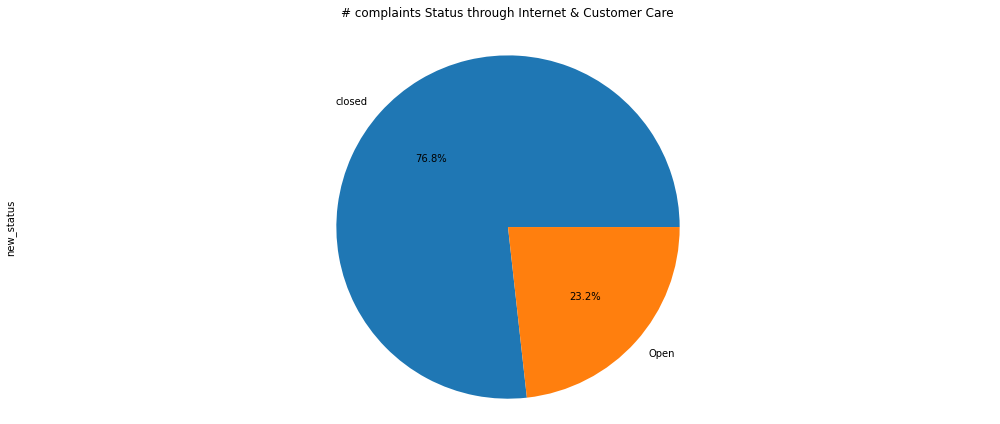

In [ ]:
df_received.new_status.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (14,6))
plt.axis('equal')
plt.title('# complaints Status through Internet & Customer Care\n')
plt.tight_layout()
plt.show()

**...................................................end................................** *italicized text*